<a href="https://colab.research.google.com/github/jpcanamaque/codingdojo-project2/blob/master/Project2_CodingDojo_SmokersBioSignal_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Smoker Status Prediction using Bio-Signals
**Authored by:**
  - Johnroe Paulo Canamaque &lt;jpcanamaque@gmail.com&gt;

**Source of data:**
- https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction-using-biosignals

**Brief description of data:**
  - Smoking has been proven to negatively affect health in a multitude of ways.Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world's overall health.

  According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.

  Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. however, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years.

  A group of scientists are working on predictive models with smoking status as the prediction target. Your task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals

## Part 0: Modules and Data Import

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

# Viz modules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pre-processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, \
roc_auc_score

# Misc
from sklearn import set_config
set_config(display='diagram')
pd.set_option('display.max_colwidth', None)

In [2]:
# Fetch the data from the data source and assign to a data frame variable
smokers = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vScgQWdl1UmogQAzMJpOI4tbaZsN0Zsp2GQy4FV_XWdtKZUi1DsEfXKhGlPAd4JChuz8MqWE7zuVyLB/pub?gid=1259380212&single=true&output=csv'
smokers_df = pd.read_csv(smokers)
smokers_df.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
5,60,160,50,78.0,1.0,0.9,2,2,126,75,...,98,64,13.9,1,1.0,47,23,70,0,1
6,40,175,90,95.0,0.9,1.0,1,1,130,88,...,39,102,16.5,1,1.0,19,22,19,0,0
7,40,180,75,85.0,1.5,1.5,1,1,110,60,...,58,99,14.0,2,1.4,29,20,32,1,1
8,40,170,60,74.0,1.2,1.5,1,1,89,57,...,60,104,12.9,2,0.7,17,17,14,0,0
9,45,155,55,78.0,0.7,1.0,1,1,114,81,...,41,107,13.1,1,0.6,22,15,56,0,0


## Part 1: Data Dictionary

<div style="padding: 10px; border: 2px solid; border-radius: 5px; font-family:'Verdana';font-weight: 500; font-size: 24px">
<table>
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Possible Values</th>
  </tr>
  <tr>
    <td>age</td>
    <td>Age of the individual</td>
    <td>Continuous value (5-year gap)</td>
  </tr>
  <tr>
    <td>height(cm)</td>
    <td>Height in centimeters</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>weight(kg)</td>
    <td>Weight in kilograms</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>waist(cm)</td>
    <td>Waist circumference in centimeters</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>eyesight(left)</td>
    <td>Left eye eyesight measurement</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>eyesight(right)</td>
    <td>Right eye eyesight measurement</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>hearing(left)</td>
    <td>Left ear hearing assessment</td>
    <td>Discrete values (e.g., 1 for normal, 2 for impaired)</td>
  </tr>
  <tr>
    <td>hearing(right)</td>
    <td>Right ear hearing assessment</td>
    <td>Discrete values (e.g., 1 for normal, 2 for impaired)</td>
  </tr>
  <tr>
    <td>systolic</td>
    <td>Systolic blood pressure</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>relaxation</td>
    <td>Diastolic blood pressure (relaxation)</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>fasting blood sugar</td>
    <td>Fasting blood sugar level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>Cholesterol</td>
    <td>Total cholesterol level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>triglyceride</td>
    <td>Triglyceride level in the blood</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>HDL</td>
    <td>HDL cholesterol level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>LDL</td>
    <td>LDL cholesterol level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>hemoglobin</td>
    <td>Hemoglobin level in the blood</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>Urine protein</td>
    <td>Presence of urine protein</td>
    <td>Discrete values (e.g., 1 for presence, 0 for absence)</td>
  </tr>
  <tr>
    <td>serum creatinine</td>
    <td>Serum creatinine level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>AST</td>
    <td>AST (glutamic oxaloacetic transaminase) level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>ALT</td>
    <td>ALT (glutamic pyruvic transaminase) level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>Gtp</td>
    <td>γ-GTP level</td>
    <td>Continuous value</td>
  </tr>
  <tr>
    <td>dental caries</td>
    <td>Presence of dental caries</td>
    <td>Discrete values (e.g., 1 for presence, 0 for absence)</td>
  </tr>
  <tr>
    <td>smoking</td>
    <td>Smoking status</td>
    <td>Discrete values (e.g., 1 for smoker, 0 for non-smoker)</td>
  </tr>
</table>
</div>

<br>

## Part 2: Data Cleansing
### Overview
- There are 38984 rows and 23 columns
- Columns are in right data type, renamed for easier access
- Removed irrelevant columns
- No duplicates, nulls, and outliers

In [3]:
# Getting the shape of the dataframe to determine row and column count
smokers_df.shape

# There are 38984 rows and 23 columns for this dataframe

(38984, 23)

In [4]:
# Checking the data types of each columns, and from here, try to set the right
# data type for the columns

smokers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [5]:
# Renaming columns for easier access
# For uniformity, change all column headers to lower_case
smokers_df.columns = smokers_df.columns.str.lower().str.replace(" ", "_")

In [6]:
# In this part, we will check if we have values that are not standardized
# For this, we will check for each columns and check for the values generated
for col in smokers_df.columns:
  print(f"Check for column {col}: ")
  display(smokers_df[col].value_counts())
  print("=============================")

Check for column age: 


40    10667
45     4946
60     4262
50     3901
55     3451
35     3148
30     2868
25     2459
20     1133
65      928
70      586
75      424
80      197
85       14
Name: age, dtype: int64

Check for column height(cm): 


170    7985
165    7004
160    6236
175    5617
155    5292
150    3132
180    2203
145     843
185     495
140     147
190      25
135       4
130       1
Name: height(cm), dtype: int64

Check for column weight(kg): 


65     5733
60     5671
70     5413
55     5120
75     4241
50     3872
80     2871
85     1775
45     1661
90     1051
95      601
100     325
40      324
105     145
110      82
115      37
35       30
120      17
30        5
125       5
130       4
135       1
Name: weight(kg), dtype: int64

Check for column waist(cm): 


80.0     1350
82.0     1260
81.0     1227
84.0     1200
78.0     1153
         ... 
107.7       1
58.5        1
115.6       1
123.0       1
106.2       1
Name: waist(cm), Length: 545, dtype: int64

Check for column eyesight(left): 


1.2    8880
1.0    8615
1.5    5524
0.8    3594
0.9    3591
0.7    3116
0.6    1777
0.5    1472
0.4     860
0.3     609
0.2     315
2.0     286
0.1     248
9.9      70
1.6      14
1.3       9
1.1       2
1.8       1
1.9       1
Name: eyesight(left), dtype: int64

Check for column eyesight(right): 


1.2    8819
1.0    8730
1.5    5306
0.8    3726
0.9    3688
0.7    2990
0.6    1699
0.5    1530
0.4     937
0.3     587
0.2     357
0.1     264
2.0     261
9.9      68
1.6      15
1.3       5
1.1       2
Name: eyesight(right), dtype: int64

Check for column hearing(left): 


1    37995
2      989
Name: hearing(left), dtype: int64

Check for column hearing(right): 


1    37963
2     1021
Name: hearing(right), dtype: int64

Check for column systolic: 


110    2476
120    2407
130    2332
118    2099
116    1099
       ... 
79        1
192       1
187       1
182       1
74        1
Name: systolic, Length: 125, dtype: int64

Check for column relaxation: 


80     3819
70     3658
78     2257
72     1515
60     1491
       ... 
47        1
137       1
117       1
124       1
127       1
Name: relaxation, Length: 94, dtype: int64

Check for column fasting_blood_sugar: 


94     1552
95     1524
97     1520
91     1489
93     1487
       ... 
282       1
269       1
54        1
58        1
423       1
Name: fasting_blood_sugar, Length: 258, dtype: int64

Check for column cholesterol: 


199    479
192    470
178    462
198    458
187    456
      ... 
356      1
346      1
442      1
97       1
337      1
Name: cholesterol, Length: 279, dtype: int64

Check for column triglyceride: 


71     373
85     364
82     364
79     353
83     332
      ... 
15       1
11       1
8        1
548      1
999      1
Name: triglyceride, Length: 389, dtype: int64

Check for column hdl: 


50     1183
51     1158
55     1155
54     1154
47     1144
       ... 
159       1
21        1
132       1
144       1
4         1
Name: hdl, Length: 122, dtype: int64

Check for column ldl: 


112     526
110     507
107     497
106     496
101     482
       ... 
267       1
367       1
1220      1
282       1
800       1
Name: ldl, Length: 286, dtype: int64

Check for column hemoglobin: 


15.4    1080
15.6    1054
15.0    1049
15.3    1035
15.7    1023
        ... 
20.9       1
6.2        1
6.1        1
21.1       1
20.4       1
Name: hemoglobin, Length: 143, dtype: int64

Check for column urine_protein: 


1    36836
2     1236
3      667
4      182
5       58
6        5
Name: urine_protein, dtype: int64

Check for column serum_creatinine: 


0.9     7963
0.8     7363
1.0     6806
0.7     5234
1.1     4264
0.6     3137
1.2     2028
0.5     1022
1.3      632
1.4      211
0.4      143
1.5       65
1.6       33
0.1       15
1.7       11
1.8       11
1.9        8
0.3        7
2.0        6
2.1        3
2.5        3
2.6        3
2.2        2
7.4        2
0.2        2
3.4        2
3.3        1
5.9        1
6.4        1
3.0        1
11.6       1
9.9        1
5.0        1
10.0       1
Name: serum_creatinine, dtype: int64

Check for column ast: 


20     2636
21     2604
22     2501
19     2474
23     2334
       ... 
128       1
315       1
145       1
225       1
387       1
Name: ast, Length: 195, dtype: int64

Check for column alt: 


15      1927
16      1863
17      1802
18      1791
14      1781
        ... 
224        1
269        1
299        1
146        1
2914       1
Name: alt, Length: 230, dtype: int64

Check for column gtp: 


16     1484
14     1477
15     1454
17     1400
18     1387
       ... 
507       1
764       1
435       1
766       1
322       1
Name: gtp, Length: 439, dtype: int64

Check for column dental_caries: 


0    30625
1     8359
Name: dental_caries, dtype: int64

Check for column smoking: 


0    24666
1    14318
Name: smoking, dtype: int64

After checking the data, most of the data has the right contents and right data types associated with it.

We need to remove duplicate values in order to ensure the quality of the data (if there are any) and to prevent it from messing up with out future predictions

In [7]:
# Check for duplicates
smokers_df.duplicated().sum()

5517

In [8]:
# Remove duplicate values
smokers_df = smokers_df.drop_duplicates()

In [9]:
# Initial Checking for NA values
smokers_df.isna().any()

age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting_blood_sugar    False
cholesterol            False
triglyceride           False
hdl                    False
ldl                    False
hemoglobin             False
urine_protein          False
serum_creatinine       False
ast                    False
alt                    False
gtp                    False
dental_caries          False
smoking                False
dtype: bool

Since the data is complete, there will be no need to impute the missing data

In [10]:
# Doing some final check to all the columns in the dataframe by doing some
# stat work

smokers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,33467.0,44.153943,12.071768,20.0,40.0,40.0,55.0,85.0
height(cm),33467.0,164.684465,9.195867,130.0,160.0,165.0,170.0,190.0
weight(kg),33467.0,65.930319,12.877955,30.0,55.0,65.0,75.0,135.0
waist(cm),33467.0,82.081501,9.310533,51.0,76.0,82.0,88.0,129.0
eyesight(left),33467.0,1.013849,0.496245,0.1,0.8,1.0,1.2,9.9
eyesight(right),33467.0,1.009553,0.497867,0.1,0.8,1.0,1.2,9.9
hearing(left),33467.0,1.025368,0.157243,1.0,1.0,1.0,1.0,2.0
hearing(right),33467.0,1.026056,0.159303,1.0,1.0,1.0,1.0,2.0
systolic,33467.0,121.498730,13.671019,71.0,112.0,120.0,130.0,233.0
relaxation,33467.0,76.017599,9.672070,40.0,70.0,76.0,82.0,146.0


In [11]:
# Final view of the cleaned data

smokers_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


## Part 3: Exploratory Data Analysis

In [12]:
# Checking for the characteristics of our data
# Let us first determine our data types to group them into Categorical and Numerical
smokers_df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting_blood_sugar      int64
cholesterol              int64
triglyceride             int64
hdl                      int64
ldl                      int64
hemoglobin             float64
urine_protein            int64
serum_creatinine       float64
ast                      int64
alt                      int64
gtp                      int64
dental_caries            int64
smoking                  int64
dtype: object

Following the data dictionary, columns `hearing(left)`, `hearing(right)`, `urine_protein`, `dental_caries`, and `smoking` are defined as discrete values.

In this case, we will treat this values as categorical values, while the rest will be treated as numerical values.

In [13]:
# Getting all identified categorical columns
cat_columns = ['hearing(left)', 'hearing(right)', 'urine_protein', 'dental_caries', 'smoking']

# Getting all other columns aside the categorical columns
num_cols = list(smokers_df.drop(columns=cat_columns).columns)

In [14]:
# Grouping categorical data
smokers_cat_data_df = smokers_df[cat_columns]

# Grouping numerical data
smokers_num_data_df = smokers_df[num_cols]

# Display the columns per category
print('Categorical Columns: ', smokers_cat_data_df.columns, '\n\n')
print('Numerical Columns: ', smokers_num_data_df.columns)

Categorical Columns:  Index(['hearing(left)', 'hearing(right)', 'urine_protein', 'dental_caries',
       'smoking'],
      dtype='object') 


Numerical Columns:  Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting_blood_sugar',
       'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin',
       'serum_creatinine', 'ast', 'alt', 'gtp'],
      dtype='object')


### Distribution of the Target Column

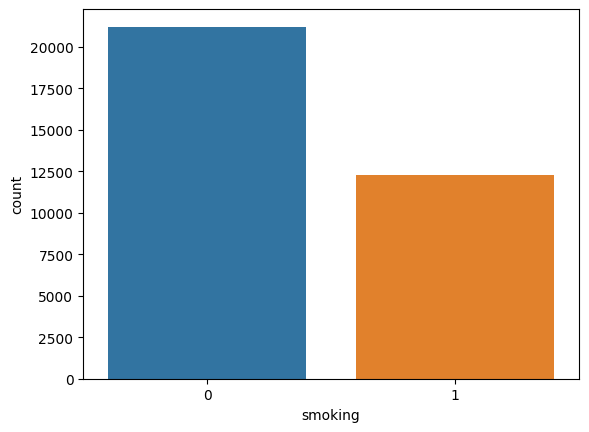

In [15]:
# Checking for the distribution of the target class
sns.countplot(smokers_df, x='smoking');

Based on the graph above, the data suggests that:

- Our dataset is not balanced, as there are more non-smokers than smokers in the dataset. We need to consider this in creating our model as the balance is a vital factor in the performance of the model

### Distribution of the Numerical Columns

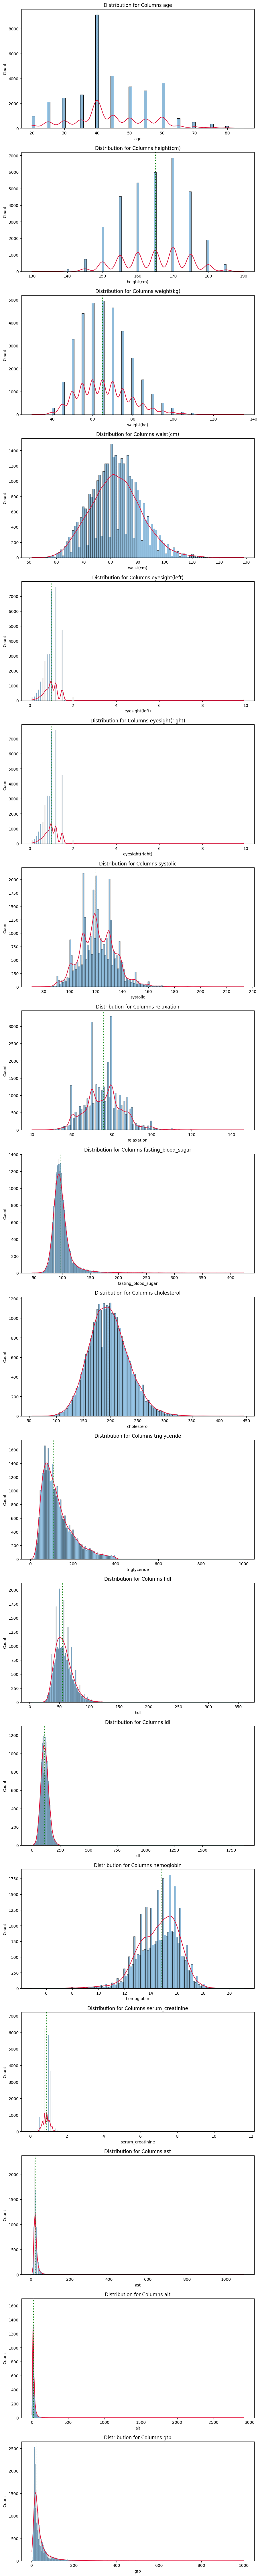

In [16]:
# Select all numerical columns
cols = list(smokers_num_data_df.columns)

# Create the subplots
fig, ax = plt.subplots(len(cols), 1, figsize=(10,45))

# Loop through the columns then draw the histogram for each columns
for idx, col in enumerate(cols):
  # Create histogram
  g = sns.histplot(data=smokers_num_data_df, x=col, ax=ax[idx],  kde=True)

  # Draw bell curve
  g.lines[0].set_color('crimson')

  # Set title
  ax[idx].set_title(f'Distribution for Columns {col}')

  # Set median line
  ax[idx].axvline(smokers_num_data_df[col].median(), color="green", ls=":")

# Chart layout settings
plt.tight_layout(pad=4)
plt.subplots_adjust(wspace = 0.2, hspace = 0.2 ,top = 2);

From the graph above, here are some of the notable impressions on the dataset.
- Majority of the columns not mentioned below are positively skewed, which suggests that most of the values are above the observed mode of the distribution.
- Column `hemoglobin` appears to be negatively skewed, which suggests that most of the values are falling below the observed mode of the distribution.
- Columns `waist`, `systolic`, and `cholesterol` appears to be a normally distributed column.
- Due to the majority of columns that are positively skewed, there might be a significant amount of outliers in the dataset.

To better understand our data, let us selecte some of the columns and determine the relationship of their distribution to our target variable

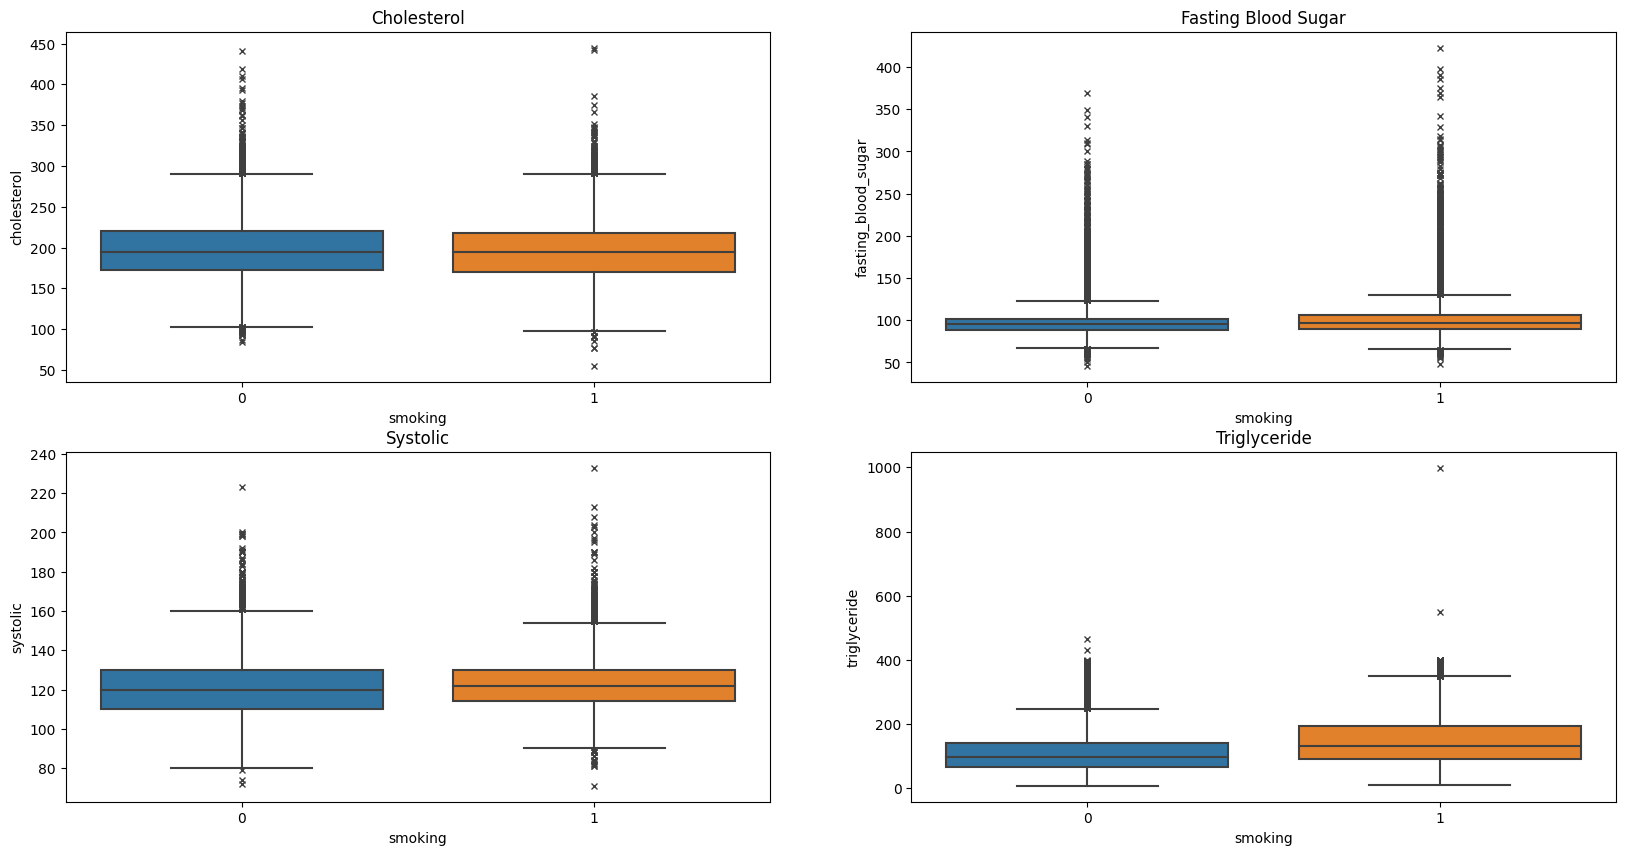

In [17]:
cp_smokers_df = smokers_df.copy()

plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.boxplot(data = cp_smokers_df, x= 'smoking', y = 'cholesterol', flierprops={"marker": "x"},)
plt.title('Cholesterol')

plt.subplot(222)
sns.boxplot(data = cp_smokers_df, x = 'smoking', y = 'fasting_blood_sugar', flierprops={"marker": "x"},)
plt.title('Fasting Blood Sugar')

plt.subplot(223)
sns.boxplot(data = cp_smokers_df, x = 'smoking', y = 'systolic', flierprops={"marker": "x"},)
plt.title('Systolic')

plt.subplot(224)
sns.boxplot(data = cp_smokers_df, x = 'smoking', y = 'triglyceride', flierprops={"marker": "x"},)
plt.title('Triglyceride');

Based the graph above, the data suggests:
- There is almost no difference on the distribution of `cholesterol` among smoking and non-smoking individuals. However, outliers are evidently observable on the smoking group, especially below the minimum line.
- The `fasting_blood_sugar` of smoking group is relatively higher than the non-smoking group. While the median value of the smoking group is slightly higher than the non-smoking group, it is noticed that there is a higher distribution on the smoking group.
- The `systolic` value of the non-smoking group is relatively lower than the smoking group. It also suggests that the distribution of non-smokers are higher than the smoking group. There is an observable number of outliers in the smoking group as well.
- The median `triglyceride` of the smoking group is near the 75th percentile of the non-smoking group, which indicates higher values in the smoking group. Alos noticed the high distribution of values in the smoking group. There is also an extreme outlier on the smoking group.

### Distribution of the Categorical Columns

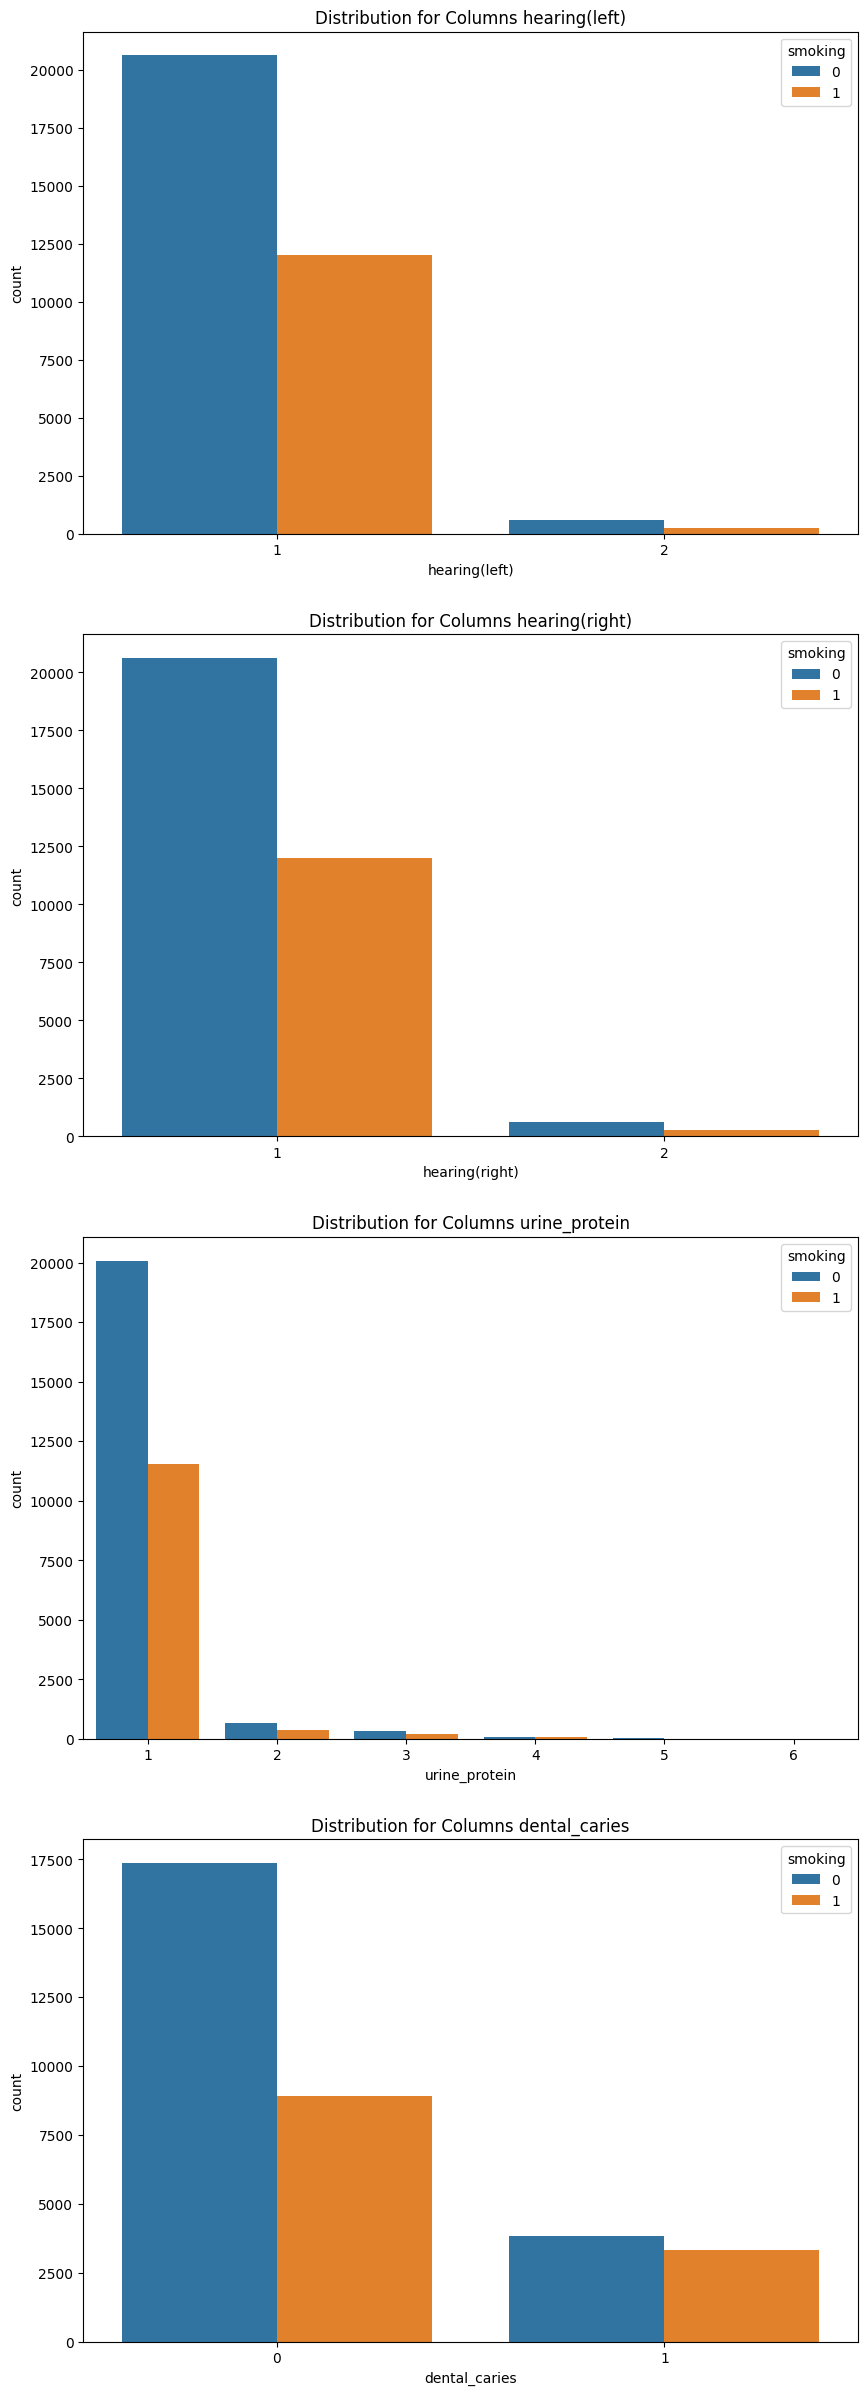

In [18]:
# Select all categorical columns
cols = list(smokers_cat_data_df.drop(columns="smoking").columns)

# Create the subplots
fig, ax = plt.subplots(len(cols), 1, figsize=(10,30))

# Loop through the columns then draw the countplot for each columns
for idx, col in enumerate(cols):
  # Create coutplot
  g = sns.countplot(data=smokers_df, x=col, ax=ax[idx], hue='smoking')

  # Set title
  ax[idx].set_title(f'Distribution for Columns {col}')


Based on the graph above, the data suggests that following:
- Majority of the data have normal hearing on both left and right ears.
- Majority of the data have no urine protein
- Majority of the data does not have dental caries.
- Majority of the distribution are on the non-smoking side

Let us now check the correlation across all the variables in the dataset. To achieve this, we will create a heatmap.

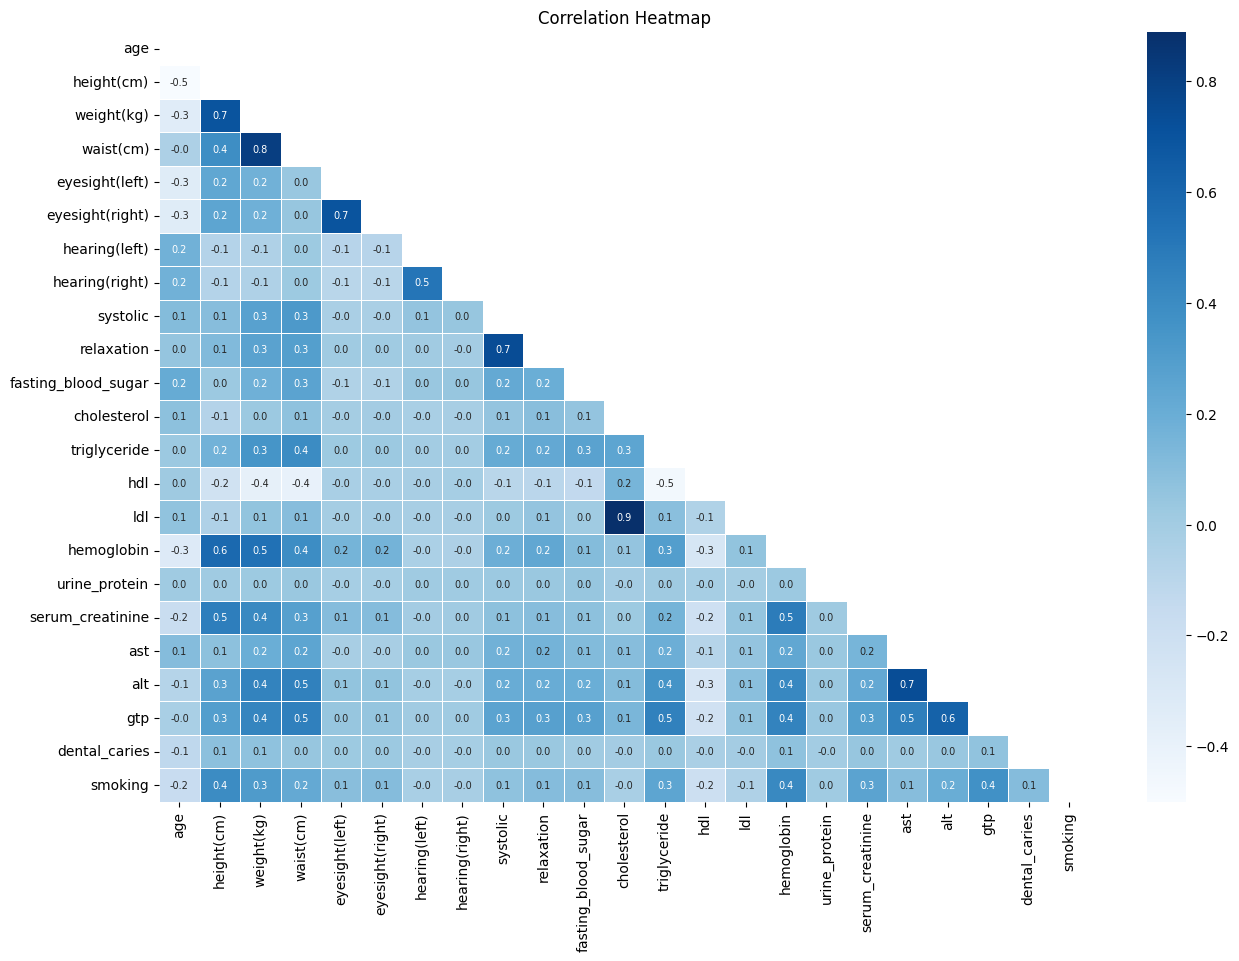

In [19]:
# Finding the correlation using heatmap
corr = smokers_df.corr(numeric_only=True, method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt=".1f", mask=mask, linewidths=.5, annot_kws={"size": 7});
plt.title('Correlation Heatmap');


Based on the correlation above to the target value, the following is observed:

- `height`, `weight`, `waist`, `triglyceride`, `hemoglobin`, `serum_creatinine`, and `gtp` has a weak positive correlation to the `smoking` columns


Other notable correlations observed are the following:
- `ldl` to `cholesterol` has strong positive correlation
- `weight` to `waist` has strong positive correlation
- `height` to `weight` has moderate positive correlation
- `systolic` to `relaxation` has moderate positive correlation
- `alt` to `ast` has moderate positive correlation
- `hdl` to `triglyceride` has moderate negative correlation

<div style="padding: 10px; border: 2px solid #DBD3CA; border-radius: 5px; font-weight: 500">
    <span style="font-weight: 700;color:#A18D74; font-size:16px"><i>Note:</i></span> correlation does not imply causation, and further analysis, including feature selection and modeling, is needed to build a predictive model.
</div>

## Part 4: Explanatory Data Analysis


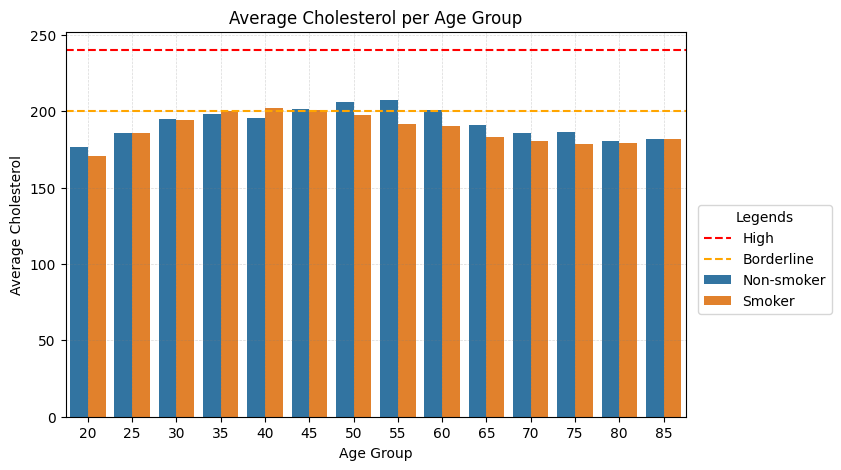

In [20]:
# Graph 1: Average Cholesterol per Age Group
data = smokers_df.copy()
data = data.groupby(['age', 'smoking'], as_index=False)[['cholesterol']].mean()

data.replace({'smoking' : {0: 'Non-smoker', 1: 'Smoker'}}, inplace=True)

fig, ax = plt.subplots(figsize=(8, 5))

# Draw the bar graph
g = sns.barplot(
    ax=ax,
    y = 'cholesterol',
    x = 'age',
    hue = 'smoking',
    data = data,
)

# Set the borderline value for the cholesterol
# Ref: https://www.healthline.com/health/high-cholesterol/levels-by-age#adults
high_chol = 240
border_chol = 200
g.axhline(240, linestyle = '--', color='red', label="High")
g.axhline(200, linestyle = '--', color='orange', label="Borderline")

# Set the title
ax.set_title('Average Cholesterol per Age Group')

# Setting the x axis
ax.set_xlabel("Age Group")

# Setting the y axis
ax.set_ylabel("Average Cholesterol");

# Add legend outside the graph
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0, title="Legends")

# Add grids
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)


In [21]:
# Graph 2: Cholesterol LDL and HDL Relationship Among Smoking and Non-smoking groups
data = smokers_df.copy()
data.replace({'smoking' : {0: 'Non-smoker', 1: 'Smoker'}}, inplace=True)

fig = px.scatter(
    data,
    x="ldl",
    y="hdl",
    color='smoking',
    symbol='smoking',
    title="Cholesterol LDL and HDL Relationship Among Smoking and Non-smoking Groups",
    labels={
          "hdl": "High Density Lipoproteins",
          "ldl": "Low Density Lipoproteins",
          "smoking": "Type"
      },
)

fig.show()

## Part 5: Model Generation

Based on the research problem, our task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals

In [37]:
# Create evaluation function for easier checking
# Define a function that takes in arguments and prints out a classification report and confusion matrices
def eval_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(10,5)):
  """Given a model, features, and labels, prints a classification report and
  confusion matrices"""

  test_preds = model.predict(X_test)
  print(classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=2, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax[0])
  ax[0].set_title('Not Normalized')

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  ax[1].set_title('Normalized Along True Axis')

  plt.tight_layout()
  plt.show()

In [23]:
# Define a function to evaluate classification models

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  return accuracy, recall, precision, f1

### Data Pre-processing
- All numericals will be scaled using `StandardScaler`
- All categorical columns will be encoded using `OneHotEncoder`

In [24]:
# Identify targets and features
X = smokers_df.drop(columns=['smoking'])
y = smokers_df['smoking']

In [25]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [26]:
# Creating the column selectors

# Select all numerical columns
numericals = num_cols

# Select all columns that are nominal in nature
# We remove smoking column to prevent data leakage
categoricals = cat_columns
categoricals.remove('smoking')

In [27]:
# Instantiating the scalers and encoders
scaler = StandardScaler()
oh_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Instantiating the imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [28]:
# Creating the pipelines
cat_nom_pipeline = make_pipeline(freq_imputer, oh_enc)
num_pipeline = make_pipeline(mean_imputer, scaler)

In [29]:
# Create transformer tuples
num_tuple = (num_pipeline, numericals)
cat_nom_tuple = (cat_nom_pipeline, categoricals)

In [30]:
# Creating transformer
transformer = make_column_transformer(num_tuple, cat_nom_tuple, remainder = 'passthrough')

# Show the transformer pipeline
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'height(cm)', 'weight(kg)',
                                  'waist(cm)', 'eyesight(left)',
                                  'eyesight(right)', 'systolic', 'relaxation',
                                  'fasting_blood_sugar', 'cholesterol',
                                  'triglyceride', 'hdl', 'ldl', 'hemoglobin',
                                  'serum_creatinine', 'ast', 'alt', 'gtp']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['hearing(left)', 'hearing(right)',
                                  'urine_protein', 'dental_caries'])])

### Data Modelling
Models to be implemented
- KNeighborsClassifier
- GradientBoostingClassifier
- LGBMClassifier
- XGBClassifier

In [31]:
# List of models to be implemented
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'XGBClassifier': XGBClassifier()
  }

In [32]:
%%time
# Initiate metrics list for output
metrics_list = []

# Initial modelling with default parameters
for i, (m, model) in enumerate(models.items()):
  # Create the pipeline from transforming to the selected model
  model_pipe = make_pipeline(transformer, model)

  # Fit the training data to the pipe
  model_pipe.fit(X_train, y_train)

  # Predict the value
  train_pred = model_pipe.predict(X_train)
  test_pred = model_pipe.predict(X_test)

  # Evaluate the classification of the train and test data to the prediction
  train_accuracy, train_recall, train_precision, train_f1 = evaluate_classification(y_train, train_pred, average='macro')
  test_accuracy, test_recall, test_precision, test_f1 = evaluate_classification(y_test, test_pred, average='macro')

  # Save the details in the row
  row = {
      'Model Used': m,
      'Training Accuracy': train_accuracy,
      'Training Recall': train_recall,
      'Training Precision': train_precision,
      'Training F1 score': train_f1,
      'Testing Accuracy': test_accuracy,
      'Testing Recall': test_recall,
      'Testing Precision': test_precision,
      'Testing F1 score': test_f1,
      }
  metrics_list.append(row)

[LightGBM] [Info] Number of positive: 9193, number of negative: 15907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2300
[LightGBM] [Info] Number of data points in the train set: 25100, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366255 -> initscore=-0.548317
[LightGBM] [Info] Start training from score -0.548317
CPU times: user 19.5 s, sys: 112 ms, total: 19.6 s
Wall time: 16.4 s


In [33]:
metrics_df = pd.DataFrame(metrics_list)
metrics_df

,Model Used,Training Accuracy,Training Recall,Training Precision,Training F1 score,Testing Accuracy,Testing Recall,Testing Precision,Testing F1 score
0,KNeighborsClassifier,0.802430,0.782120,0.788372,0.784945,0.703239,0.673200,0.678826,0.675507
1,GradientBoostingClassifier,0.765100,0.748397,0.747039,0.747697,0.747460,0.728328,0.728047,0.728187
2,LGBMClassifier,0.812629,0.799716,0.797933,0.798798,0.748536,0.728627,0.729135,0.728878
3,XGBClassifier,0.878367,0.869991,0.868538,0.869252,0.740170,0.720993,0.720273,0.720626


Based on the performance of each models at default parameters:

1. `GradientBoostingClassifier` yielded the best training-testing accuracy with the best fit based on the F1 score and accuracy, despite having the worst accuracy and F1 score in the training.
1. While `LGBMClassifier` and `XGBClassifier` yieleded a better accuracy and F1 score during training. The delta to the Testing accuracy is averaging at 10%, which signifies that these models are overfitting to our dataset.
1. `KNeighborsClassifier` yielded a training accuracy of 80%, but has a very low testing accuracy at 70%. Hence, this is also an overfitted model.


### Tuning the Models
For this case we will create a tuned version of each model to see which model is best overall.

In [34]:
# Setting all the parameters for tuning all of the models
knn_param_grid = {
  'kneighborsclassifier__n_neighbors': range(1,50),
  'kneighborsclassifier__weights':['uniform','distance']
}

lgbmc_param_grid = {
  'lgbmclassifier__min_child_weight': range(1, 20),
  'lgbmclassifier__max_depth': range(1, 10),
}

gbc_param_grid = {
  'gradientboostingclassifier__n_estimators': [10, 50, 100],
  'gradientboostingclassifier__max_depth': range(1, 10)
}

xgbc_param_grid = {
  'xgbclassifier__n_estimators': [10, 50, 100],
  'xgbclassifier__max_depth': range(1, 10)
}

# Consolidating the parameter list
params = {
  'KNeighborsClassifier': knn_param_grid,
  'GradientBoostingClassifier': gbc_param_grid,
  'LGBMClassifier': lgbmc_param_grid,
  'XGBClassifier': xgbc_param_grid
}

In [35]:
%%time
# Initiate metrics list for output
tuned_metrics_list = []

# Hold the tuned models
best_model_container = {}
# Initial modelling with default parameters
for i, (m, model) in enumerate(models.items()):
  # Create the pipeline from transforming to the selected model
  model_pipe = make_pipeline(transformer, model)

  # We are going to get the best estimator based on ROC
  grid = GridSearchCV(model_pipe, params[m], scoring = 'roc_auc', cv=5, n_jobs=-1, verbose=True)

  # Fit the training data to the pipe
  grid.fit(X_train, y_train)

  # Get the best model
  best_model = grid.best_estimator_

  # Store tuned models for future use
  best_model_container[m] = best_model

  # Predict the value
  train_pred = best_model.predict(X_train)
  test_pred = best_model.predict(X_test)

  # Evaluate the classification of the train and test data to the prediction
  train_accuracy, train_recall, train_precision, train_f1 = evaluate_classification(y_train, train_pred, average='macro')
  test_accuracy, test_recall, test_precision, test_f1 = evaluate_classification(y_test, test_pred, average='macro')

  # Save the details in the row
  row = {
      'Model Used': m,
      'Training Accuracy': train_accuracy,
      'Training Recall': train_recall,
      'Training Precision': train_precision,
      'Training F1 score': train_f1,

      'Testing Accuracy': test_accuracy,
      'Testing Recall': test_recall,
      'Testing Precision': test_precision,
      'Testing F1 score': test_f1,

      'Hyperparameters': grid.best_params_
      }
  tuned_metrics_list.append(row)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 171 candidates, totalling 855 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 9193, number of negative: 15907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2300
[LightGBM] [Info] Number of data points in the train set: 25100, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366255 -> initscore=-0.548317
[LightGBM] [Info] Start training from score -0.548

In [36]:
tuned_metrics_df = pd.DataFrame(tuned_metrics_list)
print('Default')
display(metrics_df)
print('Tuned')
display(tuned_metrics_df)

Default


,Model Used,Training Accuracy,Training Recall,Training Precision,Training F1 score,Testing Accuracy,Testing Recall,Testing Precision,Testing F1 score
0,KNeighborsClassifier,0.802430,0.782120,0.788372,0.784945,0.703239,0.673200,0.678826,0.675507
1,GradientBoostingClassifier,0.765100,0.748397,0.747039,0.747697,0.747460,0.728328,0.728047,0.728187
2,LGBMClassifier,0.812629,0.799716,0.797933,0.798798,0.748536,0.728627,0.729135,0.728878
3,XGBClassifier,0.878367,0.869991,0.868538,0.869252,0.740170,0.720993,0.720273,0.720626


Tuned


,Model Used,Training Accuracy,Training Recall,Training Precision,Training F1 score,Testing Accuracy,Testing Recall,Testing Precision,Testing F1 score,Hyperparameters
0,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000,0.729055,0.698457,0.707566,0.702025,"{'kneighborsclassifier__n_neighbors': 48, 'kneighborsclassifier__weights': 'distance'}"
1,GradientBoostingClassifier,0.780199,0.763823,0.763235,0.763525,0.748775,0.729779,0.729464,0.729620,"{'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 100}"
2,LGBMClassifier,0.787769,0.773261,0.771304,0.772245,0.744592,0.725583,0.725000,0.725287,"{'lgbmclassifier__max_depth': 5, 'lgbmclassifier__min_child_weight': 13}"
3,XGBClassifier,0.765020,0.747600,0.746926,0.747258,0.750807,0.731313,0.731601,0.731456,"{'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 100}"


Based on the performance of each models with tuned parameters:

1. `XGBClassifier` yielded the best training-testing accuracy with the best fit, despite having the worst accuracy and F1 score in the training.
1. While `GradientBoostingClassifier`, and `LGBMClassifier` yielded a higher accuracy and F1 score during training. The delta to the Testing Accuracy is averaging at 4%, which signifies that these models are overfitting to our dataset.
1. `KNeighborsClassifier` yielded a training accuracy of 100%, but has a very low testing accuracy at 72%. Hence, this is also an overfitted model.

Let us check the Confusion Metrics of the best model identified above.

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     15907
           1       0.68      0.68      0.68      9193

    accuracy                           0.77     25100
   macro avg       0.75      0.75      0.75     25100
weighted avg       0.77      0.77      0.77     25100



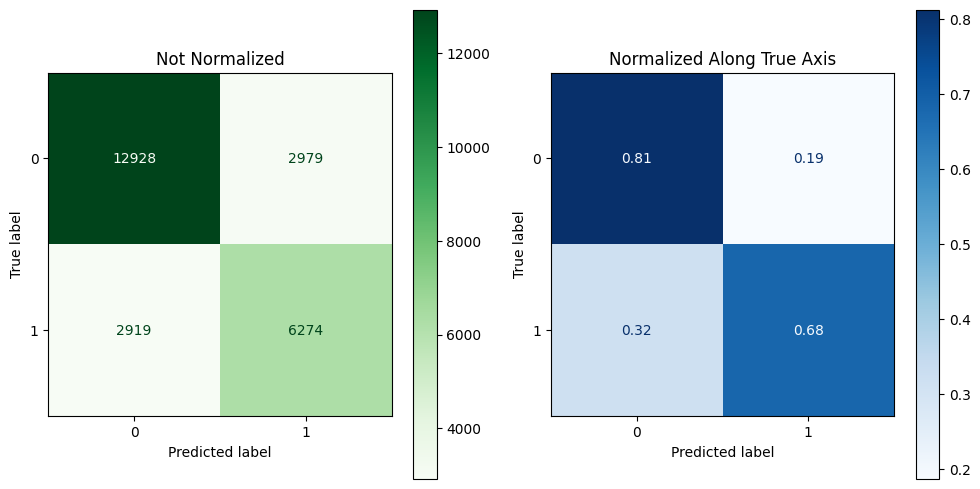

In [38]:
# Check performance of the best model in training
eval_classification(best_model_container['XGBClassifier'], X_train, y_train)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5302
           1       0.66      0.66      0.66      3065

    accuracy                           0.75      8367
   macro avg       0.73      0.73      0.73      8367
weighted avg       0.75      0.75      0.75      8367



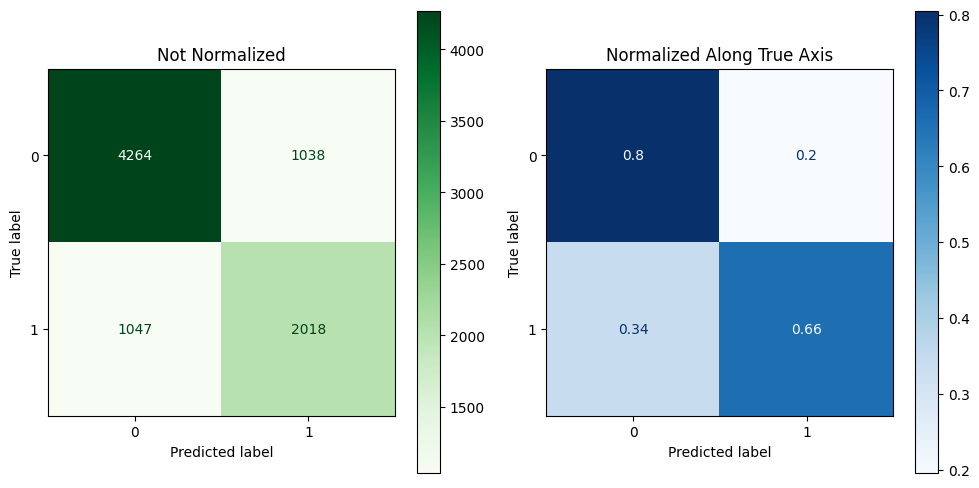

In [40]:
# Check performance of the best model in training
eval_classification(best_model_container['XGBClassifier'], X_test, y_test)

Since the tuned model is measured based on their best ROC AUC values, let us check the ROC value of the the model

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


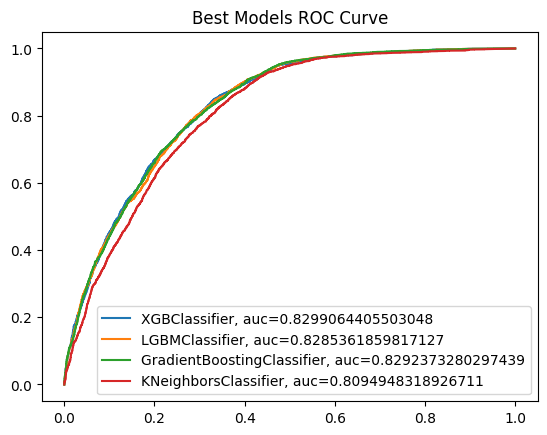

In [43]:
# Set the models to check
model_to_check = ['XGBClassifier', 'LGBMClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']

# Iterate on each model to generate ROC curve
for model in model_to_check:
  test_pred = best_model_container[model].predict_proba(X_test)[::,1]
  fpr, tpr, _ = roc_curve(y_test, test_pred)
  auc = roc_auc_score(y_test, test_pred)
  plt.plot(fpr,tpr,label=f"{model}, auc={str(auc)}")

plt.legend(loc=4)
plt.title('Best Models ROC Curve')
plt.show()

As seen on the ROC curve, `XGBClassfier` yielded the best ROC score. Hence, we suggest `XGBClassfier` as our best model for this experiment.